In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
train_images = np.load("dataset/train_images.npy")
train_labels = np.load("dataset/train_labels.npy")
test_images = np.load ("dataset/test_images.npy")
test_labels = np.load("dataset/test_labels.npy")

In [18]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(28709, 48, 48)
(28709,)
(7178, 48, 48)
(7178,)


In [19]:
label_names = ['','angry','disgust','fear','happy','neutral','sad','surprise']
label_names

['', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

label =  happy


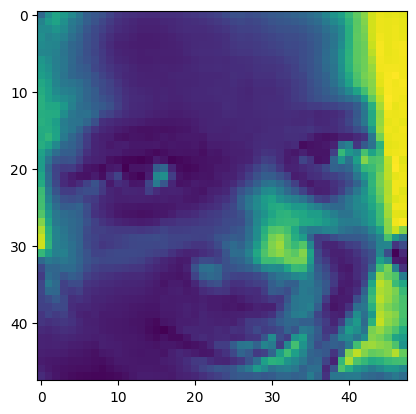

In [20]:
import matplotlib.pyplot as plt
plt.imshow(train_images[15000])
print("label = ",label_names[train_labels[14000]])

In [21]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Adjust labels to start from 0 (subtract 1 from all label values)
train_labels = train_labels - 1
test_labels = test_labels - 1

# Check the unique labels in the training dataset
unique_labels_train = np.unique(train_labels)
print("Unique labels in training data:", unique_labels_train)

# Check the unique labels in the testing dataset
unique_labels_test = np.unique(test_labels)
print("Unique labels in testing data:", unique_labels_test)

Unique labels in training data: [0 1 2 3 4 5 6]
Unique labels in testing data: [0 1 2 3 4 5 6]


In [22]:
# Convert images to single-channel format (add an extra dimension for the channel)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded format
num_classes = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Determine the image size from the data
image_height, image_width, num_channels = train_images.shape[1:]
print("Image height:", image_height)
print("Image width:", image_width)
print("Number of channels:", num_channels)

Image height: 48
Image width: 48
Number of channels: 1


In [23]:
# Build the custom CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
batch_size = 64
epochs = 25

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
404/404 [==============================] - 58s 140ms/step - loss: 1.5953 - accuracy: 0.3496 - val_loss: 3.9155 - val_accuracy: 0.0000e+00
Epoch 2/25
404/404 [==============================] - 61s 152ms/step - loss: 1.3801 - accuracy: 0.4597 - val_loss: 3.7282 - val_accuracy: 0.0017
Epoch 3/25
404/404 [==============================] - 65s 161ms/step - loss: 1.2566 - accuracy: 0.5087 - val_loss: 3.4420 - val_accuracy: 0.0589
Epoch 4/25
404/404 [==============================] - 63s 157ms/step - loss: 1.1668 - accuracy: 0.5457 - val_loss: 3.3519 - val_accuracy: 0.0857
Epoch 5/25
404/404 [==============================] - 57s 141ms/step - loss: 1.0931 - accuracy: 0.5810 - val_loss: 3.6981 - val_accuracy: 0.1362
Epoch 6/25
404/404 [==============================] - 57s 140ms/step - loss: 1.0180 - accuracy: 0.6115 - val_loss: 2.9928 - val_accuracy: 0.1369
Epoch 7/25
404/404 [==============================] - 57s 141ms/step - loss: 0.9341 - accuracy: 0.6439 - val_loss: 3.9343 - va

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose="auto")
print(f'Test accuracy: {test_accuracy}')


225/225 [==============================] - 5s 23ms/step - loss: 4.4944 - accuracy: 0.5003
Test accuracy: 0.500278651714325


In [27]:
predictions = model.predict(test_images)

225/225 [==============================] - 5s 21ms/step


In [28]:
# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate predicted accuracy
predicted_accuracy = np.mean(predicted_labels == true_labels)
print(f'Predicted accuracy: {predicted_accuracy}')


Predicted accuracy: 0.5002786291446085
